In [13]:
using CairoMakie
using FourierFlows
using JLD2
using Printf
using StatsBase
using LinearAlgebra: dot
include("../AnalysisUtils.jl")
include("../../../rsw/RSWUtils.jl")

compute_rsw_fields (generic function with 1 method)

In [14]:
function compute_action_density(run_directory, snap_idx)
    t, _, k, _ = load_snapshot(run_directory, snap_idx)
    K = sqrt.(k[:,1].^2 + k[:,2].^2)
    hist = fit(Histogram, K; closed=:left, nbins=2000)
end

function compute_diffusivity_estimate(run_directory, snap_idx)
    t1, _, _, _ = load_snapshot(run_directory, snap_idx)
    t2, _, _, _ = load_snapshot(run_directory, snap_idx + 1)
    dt = t2 - t1
    K1 = sqrt.(k[:,1].^2 + k[:,2].^2)
    hist = fit(Histogram, K1; closed=:left, nbins=200)
    #hist1 = 
end

compute_diffusivity_estimate (generic function with 1 method)

In [ ]:
#run_directory = "/scratch/nad9961/swqg/3288403/9"
#run_directory = "/scratch/nad9961/swqg/434573/2"
#run_directory = "/scratch/nad9961/twolayer_rays/1390217"
#run_directory = "/scratch/nad9961/swqg_rays/1221422"
run_directory = "/scratch/nad9961/twolayer_rays/1523230/8"
run_directory = "/scratch/nad9961/twolayer_rays/1545877/3"
f0, Cg = read_parameters(run_directory)
#nx, Lx = get_grid_size(run_directory, "qgsw")
grid = TwoDGrid(;nx=512, Lx=2π)
Nsnapshots = count_snapshots(run_directory)
t, x, k, u = load_snapshot(run_directory, 703)
println(@sprintf("%f%% NaN", sum(isnan.(k))/length(k) * 100))
#Nqg_snapshots = count_key_snapshots(run_directory, "qgsw")

compute_action_density(run_directory, 300)

In [8]:
edges = 0.0:0.05:50.0
t1, _, k1, _ = load_snapshot(run_directory, Nsnapshots-20)
K1 = sqrt.(k1[:,1].^2 + k1[:,2].^2)
hist0 = fit(Histogram, K1, edges; closed=:left)
dK = hist0.edges[1][2]-hist0.edges[1][1]
K_center = hist0.edges[1][1:end-1] .+ dK/2

D = zeros(length(hist0.weights)-1)
for offset = -20:-1
    t1, _, k1, _ = load_snapshot(run_directory, Nsnapshots + offset)
    t2, _, k2, _ = load_snapshot(run_directory, Nsnapshots + offset + 1)
    dt = t2 - t1
    K1 = sqrt.(k1[:,1].^2 + k1[:,2].^2)
    K2 = sqrt.(k2[:,1].^2 + k2[:,2].^2)
    hist1 = fit(Histogram, K1, edges; closed=:left)
    hist2 = fit(Histogram, K2, edges; closed=:left)
    #A1 = gaussian_smooth(hist1.weights, 1, 1.0) 
    #A2 = gaussian_smooth(hist2.weights, 1, 1.0)
    A1 = hist1.weights
    A2 = hist2.weights
    dK = hist2.edges[1][2]-hist2.edges[1][1]
    K_center = hist2.edges[1][1:end-1] .+ dK/2
    A_avg = (A1 + A2) / 2
    dAdt  = (A2 - A1) / dt
    flux = cumsum(dAdt * dK)
    dKAK = replace(diff(A_avg ./ K_center) / dK, 0.0=>NaN)
    D += flux[2:end] ./ (K_center[2:end] .* dKAK)
    println(offset)
end


-20
-19
-18
-17
-16
-15
-14
-13
-12
-11
-10
-9
-8
-7
-6
-5
-4
-3
-2
-1


In [ ]:
f = Figure()
ax = Axis(f[1,1])
lines!(ax, K_center[2:end], D)
#lines!(ax, K_center[2:end], 0.0001*(K_center[2:end]).^3)
f

In [14]:
t1, _, k1, _ = load_snapshot(run_directory, Nsnapshots)
t2, _, k2, _ = load_snapshot(run_directory, Nsnapshots - 1)
K1 = sqrt.(k1[:,1].^2 + k1[:,2].^2)
K2 = sqrt.(k2[:,1].^2 + k2[:,2].^2)
hist1 = fit(Histogram, K1, edges; closed=:left)
hist2 = fit(Histogram, K2, edges; closed=:left)
#A1 = gaussian_smooth(hist1.weights, 1, 1.0) 
#A2 = gaussian_smooth(hist2.weights, 1, 1.0)
A1 = hist1.weights
A2 = hist2.weights

999-element Vector{Int64}:
 121384
 140381
    315
      0
      0
      0
      0
      0
      0
      0
      0
      0
      0
      ⋮
      0
      0
      0
      0
      0
      0
      0
      0
      0
      0
      0
      0

In [11]:
function gaussian_smooth(A, kernel_size, std)
    kernel = exp.(-(-kernel_size:kernel_size).^2/(2*std^2))
    kernel ./= sum(kernel)
    A_padded = [fill(A[1], kernel_size); A; fill(A[end], kernel_size)]
    return [dot(kernel, A_padded[i:i+2*kernel_size]) for i in 1:length(A)]
end

gaussian_smooth (generic function with 1 method)

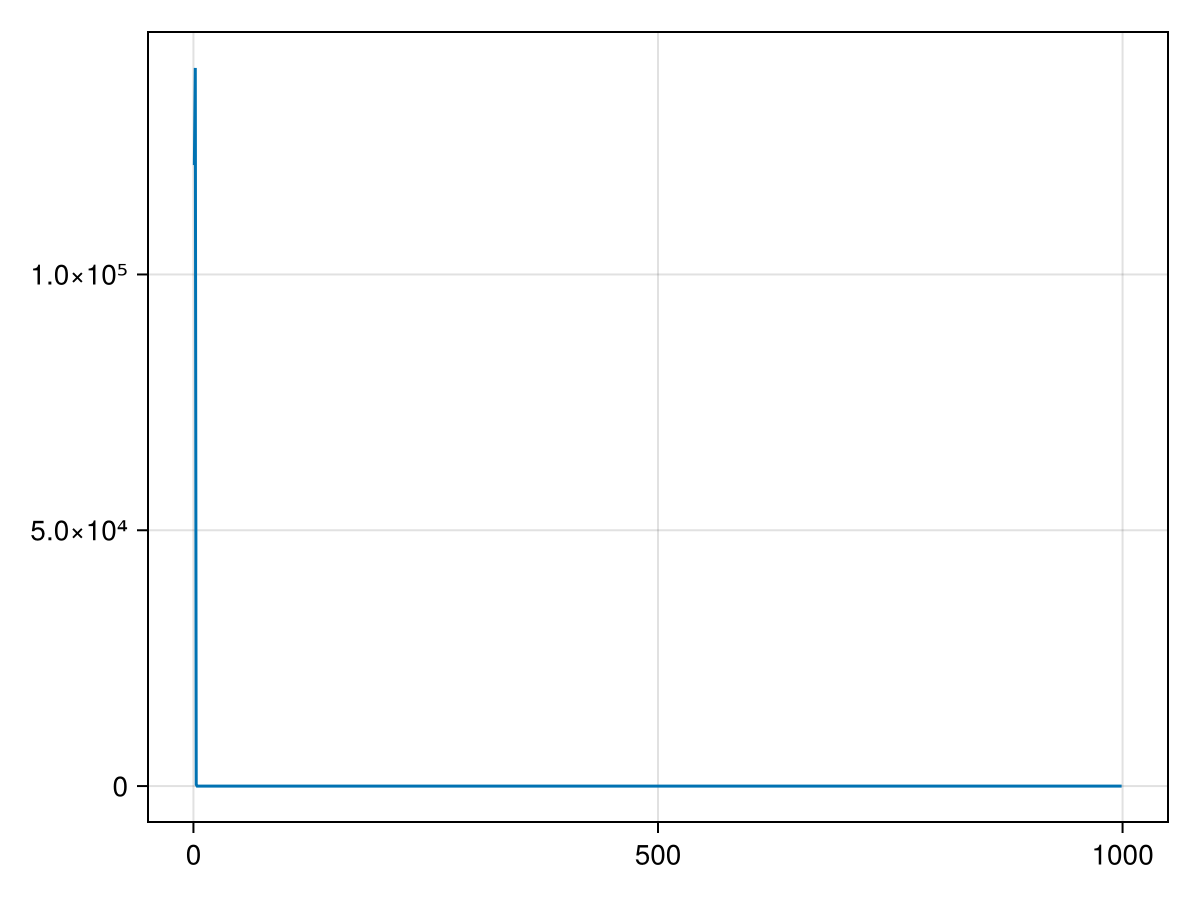

In [20]:
lines(A2)

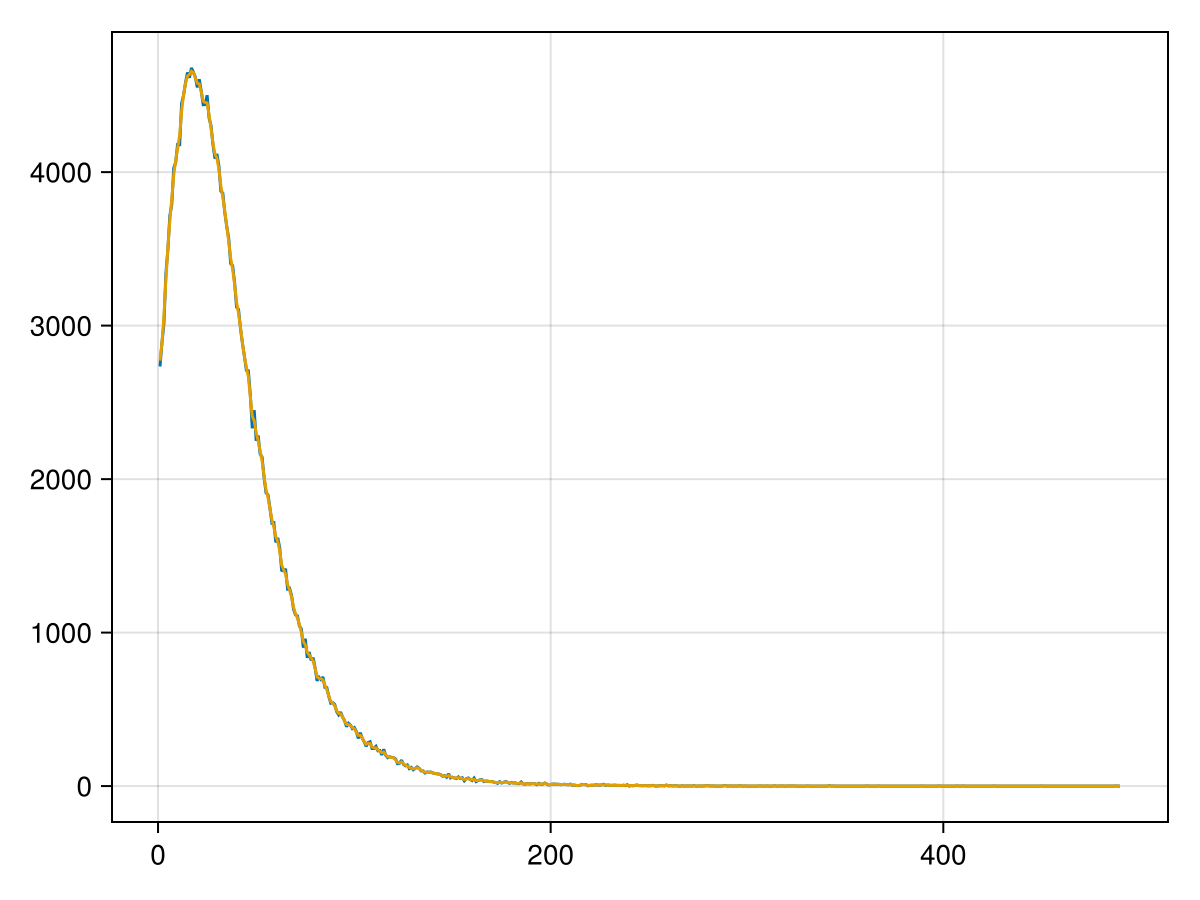

In [13]:
t1, _, k1, _ = load_snapshot(run_directory, Nsnapshots)
edges = 1.0:0.1:50.0
K = sqrt.(k1[:,1].^2 + k1[:,2].^2)
hist = fit(Histogram, K1, edges; closed=:left)
A1 = gaussian_smooth(hist.weights, 4, 0.75)

f = Figure()
ax = Axis(f[1,1])

lines!(hist.weights)
lines!(A1)

f

In [34]:
vector = [1, 2, 3, 4]
cumsum(vector)

4-element Vector{Int64}:
  1
  3
  6
 10

In [35]:
println(length(hist2.edges[1]))

152


In [43]:
flux

151-element Vector{Float64}:
 -0.009955067187547649
 -0.009955067187547649
 -0.009955067187547649
 -0.009955067187547649
  0.0
 -0.009955067187547649
  0.0
  0.019910134375095298
 -0.009955067932605706
  0.019910134375095298
  0.0
  0.039820268750190596
  0.049775335937738245
  ⋮
  0.009955066442489668
 -0.019910135865211287
  0.009955066442489668
 -0.019910135865211287
  0.009955066442489668
 -0.019910135865211287
 -0.02986520305275897
 -0.039820270240306654
 -0.019910135865211398
 -0.02986520305275908
 -0.019910135865211398
 -0.019910135865211398

In [ ]:
A_test = [1.0, 2.0, 5.0, 3.0, 1.0, 0.5, 2.0, 4.0, 3.0, 1.0]

kernel_size=3
std=1.0
kernel = exp.(-(kernel_size:kernel_size).^2/(2*std^2))

A_padded = [fill(A[1], kernel_size); A; fill(A[end], kernel_size)]


In [166]:
1 + 1

2

In [25]:
dK = 0.1
edges = 1.0:dK:50.0
K_center = edges[2:end] .+ dK/2
D = zeros(length(K_center) - 2)
A1 = zeros(length(K_center))
dAdt = zeros(length(A1))

D_accum = zeros(length(K_center))
counts = zeros(Int, length(K_center))

for idx = 300:400
    t1, _, k1, u1 = load_snapshot(run_directory, idx)
    t2, _, k2, _ = load_snapshot(run_directory, idx + 1)
    
    K1 = sqrt.(k1[:,1].^2 + k1[:,2].^2)
    K2 = sqrt.(k2[:,1].^2 + k2[:,2].^2)
    #println(maximum(K2))
    #println(sqrt.(sum(u1[:,1].^2 + u1[:,2].^2)/length(u1)))

    A1_hist = fit(Histogram, K1, edges; closed=:left)
    A2_hist = fit(Histogram, K2, edges; closed=:left)
    A1 = gaussian_smooth(A1_hist.weights ./ dK, 3, 0.5)
    A2 = gaussian_smooth(A2_hist.weights ./ dK, 3, 0.5)

    ΔK2 = (K2 .- K1).^2

    # -------------------------
    # Histogram-based accumulation
    # -------------------------
    # Weighted sum of ΔK² per bin
    hist_sum = fit(Histogram, K1, weights(ΔK2), edges; closed=:left)
    # Count of particles per bin
    hist_count = fit(Histogram, K1, edges; closed=:left)

    # Avoid division by zero
    mask = hist_count.weights .> 0
    D_accum[mask] .+= hist_sum.weights[mask] ./ (2 * (t2 - t1) .* hist_count.weights[mask])
    counts[mask] .+= 1

    A_avg = (A2 + A1)/2

    dAdt = (A2 - A1) / (t2 - t1)
    flux = -cumsum(dAdt) * dK
    flux .-= flux[end]
    AK = A_avg ./ K_center
    dAdK = (AK[3:end] - AK[1:end-2]) / (2*dK)
    K_mid = K_center[2:end-1]
    flux_mid = flux[2:end-1]

    D .+= -flux_mid ./ (K_mid .* dAdK)
    D[abs.(dAdK) .< 1e-7] .= NaN
end
D_est = D_accum ./ max.(counts, 1)

490-element Vector{Float64}:
 0.006148342806591707
 0.00691731607248854
 0.007667777804663129
 0.008458243030280347
 0.009214519832851605
 0.009953412398847823
 0.010694205696039722
 0.01141594608771865
 0.012210890224274105
 0.012983689720930277
 0.013761513901342646
 0.014566627730775437
 0.015402502033329778
 ⋮
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

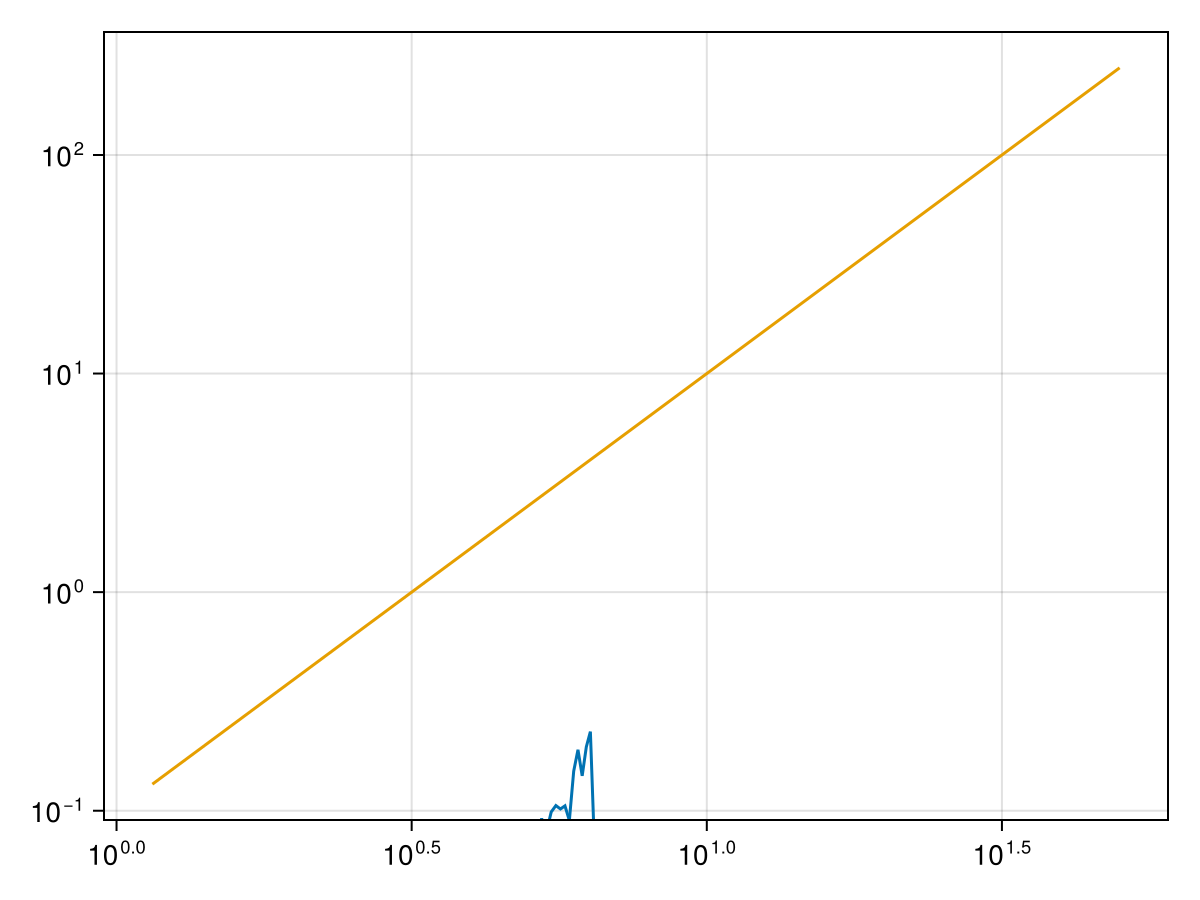

In [26]:
f = Figure()
ax = Axis(f[1,1]; xscale=log10, yscale=log10)
lines!(ax, K_center, D_est)
lines!(ax, K_center, 4*K_center.^2/40)
#lines!(ax, K_center, exp.(0.012*K_center))

f

In [240]:
using LsqFit
m(t, p) = p[1] .* t .+ p[2]
p0 = [2.0, 20.0]
fit = curve_fit(m, log.(K_center)[D_est .> 0], log.(D_est)[D_est .> 0], p0)
fit.param

2-element Vector{Float64}:
  2.2499854633647876
 -3.2315304321941944

In [236]:
any(isnan.(log.(D_est)))

false

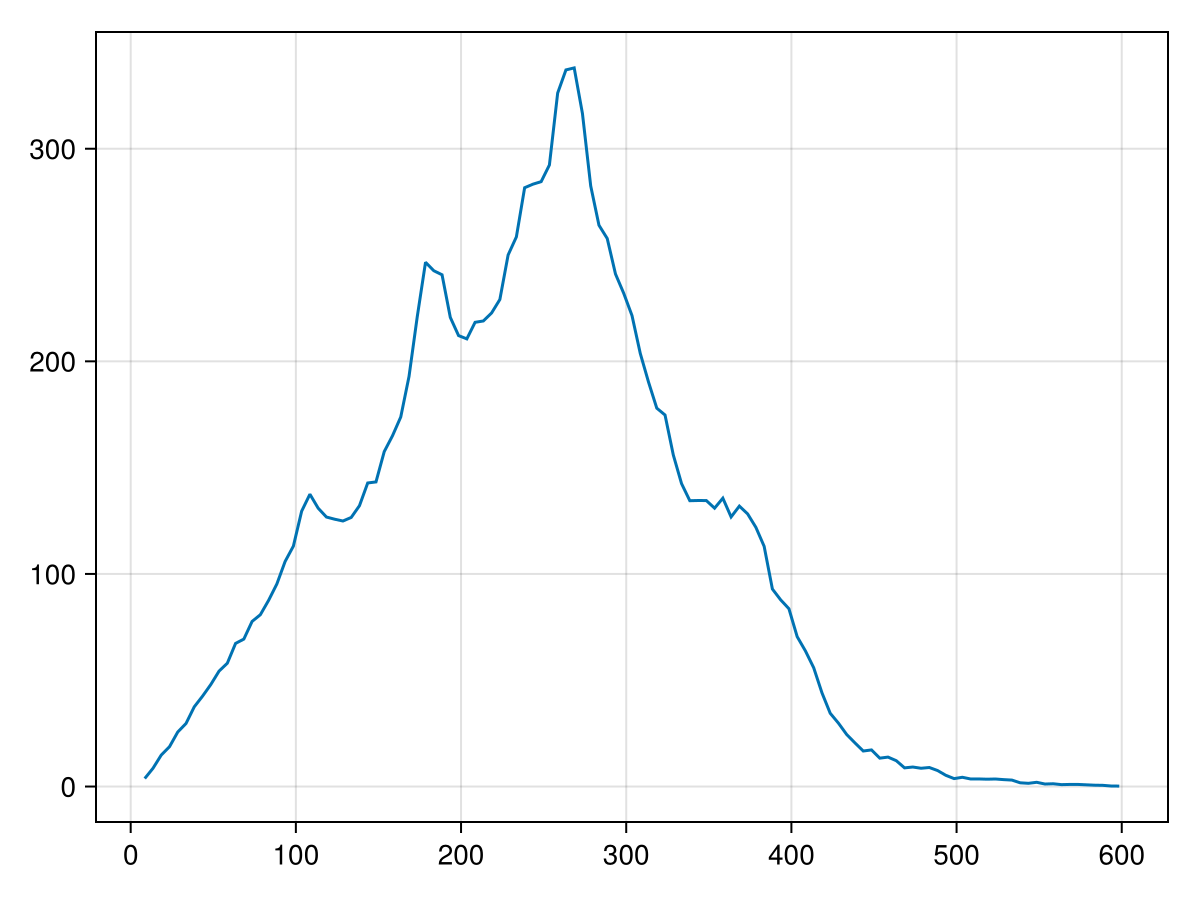

In [163]:
f = Figure()
ax = Axis(f[1,1], limits=((nothing, nothing), (-100, 100)))
lines(K_center, A1)

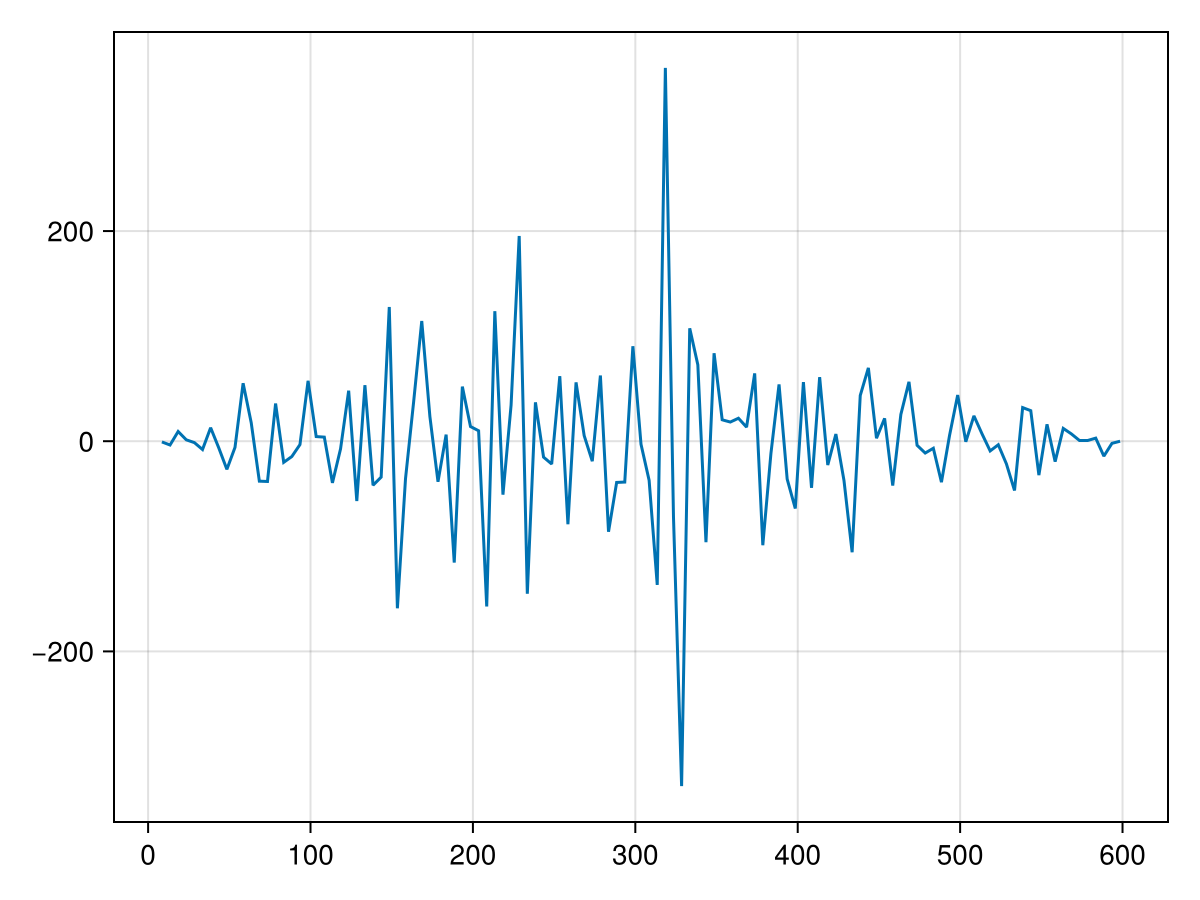

In [165]:
f = Figure()
ax = Axis(f[1,1], limits=((nothing, nothing), (-100, 100)))
lines(K_center, dAdt)

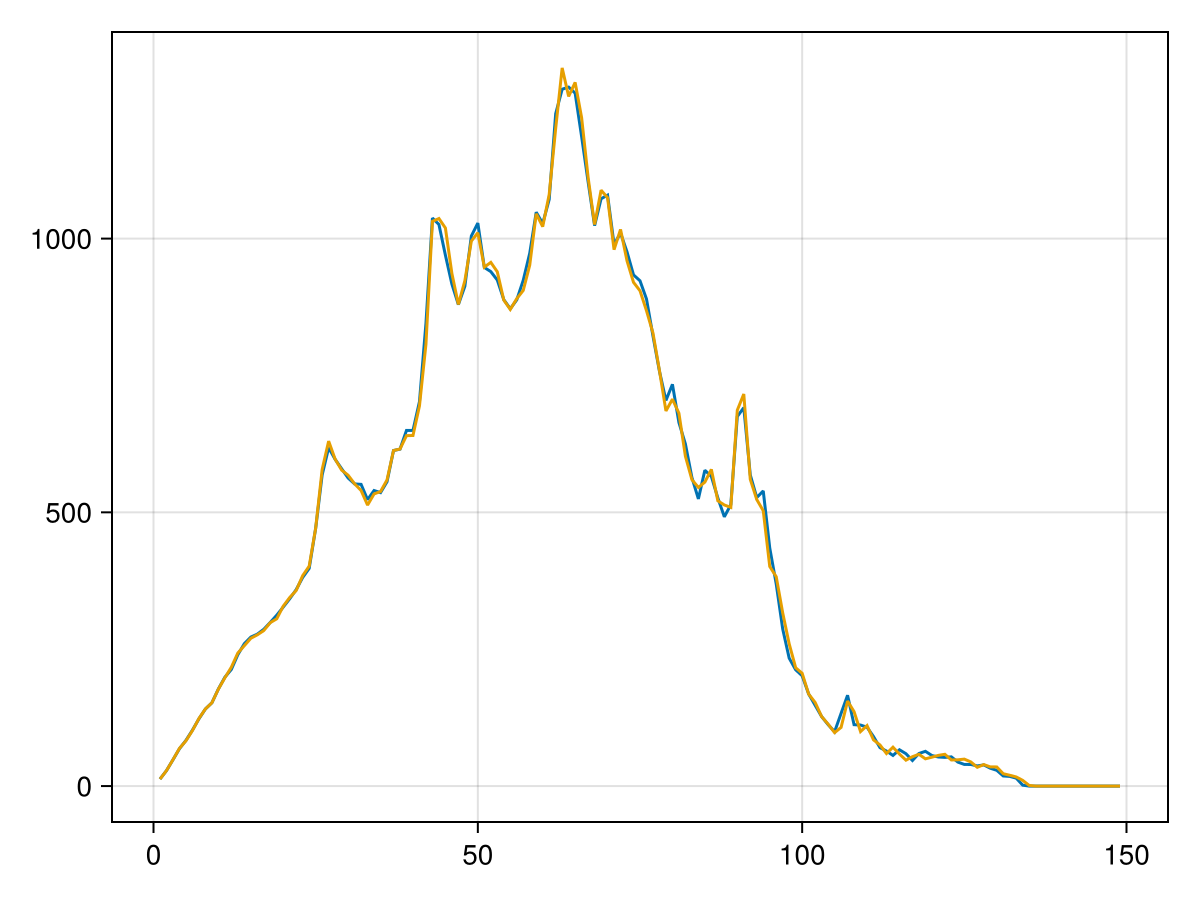

In [95]:
f = Figure()
ax = Axis(f[1,1])
lines!(A1)
lines!(A2)

f

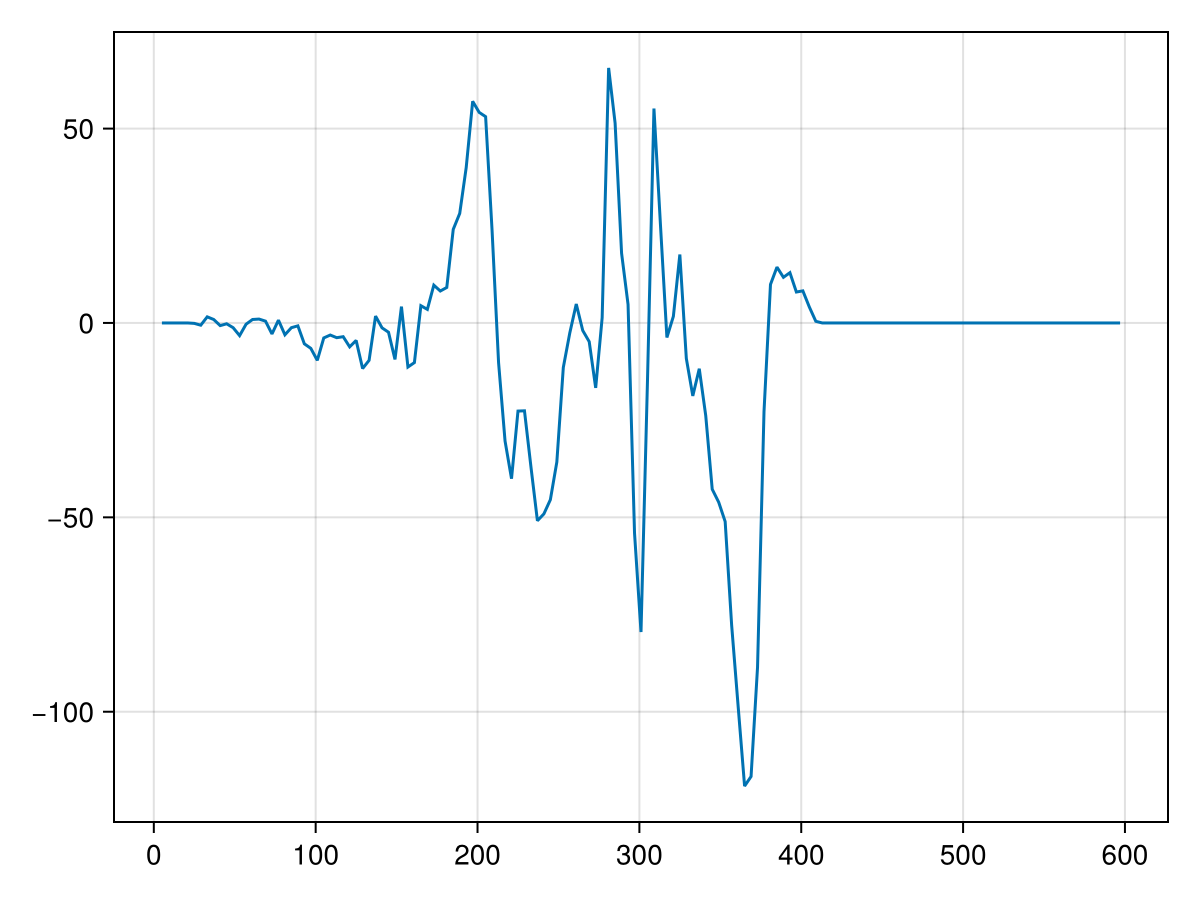

In [73]:
f = Figure()
ax = Axis(f[1,1])

A1_hist = fit(Histogram, K1, edges; closed=:left)
A2_hist = fit(Histogram, K2, edges; closed=:left)
A1 = gaussian_smooth(A1_hist.weights, 1, 0.5)
A2 = gaussian_smooth(A2_hist.weights, 1, 0.5)

lines!(ax, A1_hist.edges[1][2:end], cumsum(A2 - A1))
#lines!(ax, A2.edges[1][2:end], A2.weights)

f

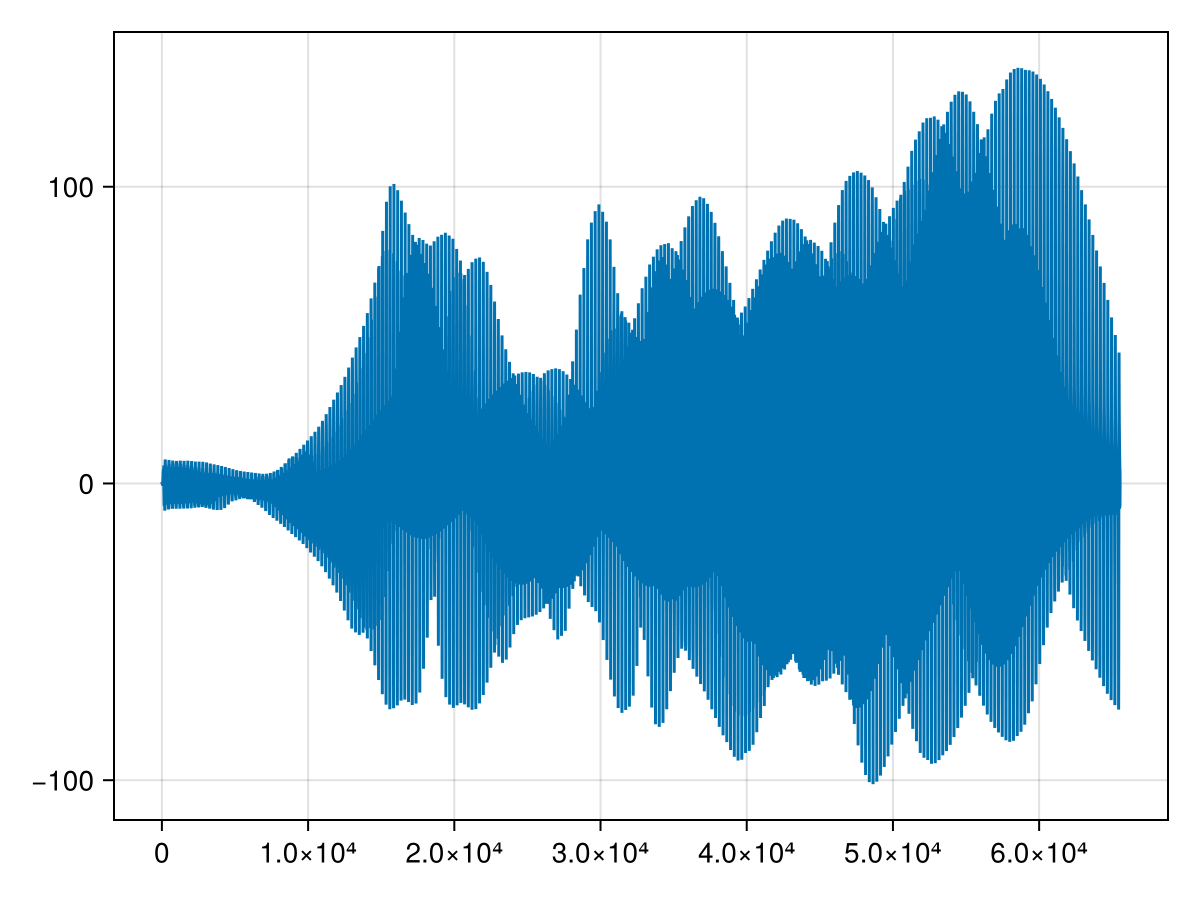

In [39]:
t1, _, k1, _ = load_snapshot(run_directory, 2)
t2, _, k2, _ = load_snapshot(run_directory, 30)

K1 = sqrt.(k1[:,1].^2 + k1[:,2].^2)
K2 = sqrt.(k2[:,1].^2 + k2[:,2].^2)
lines(K2 - K1)

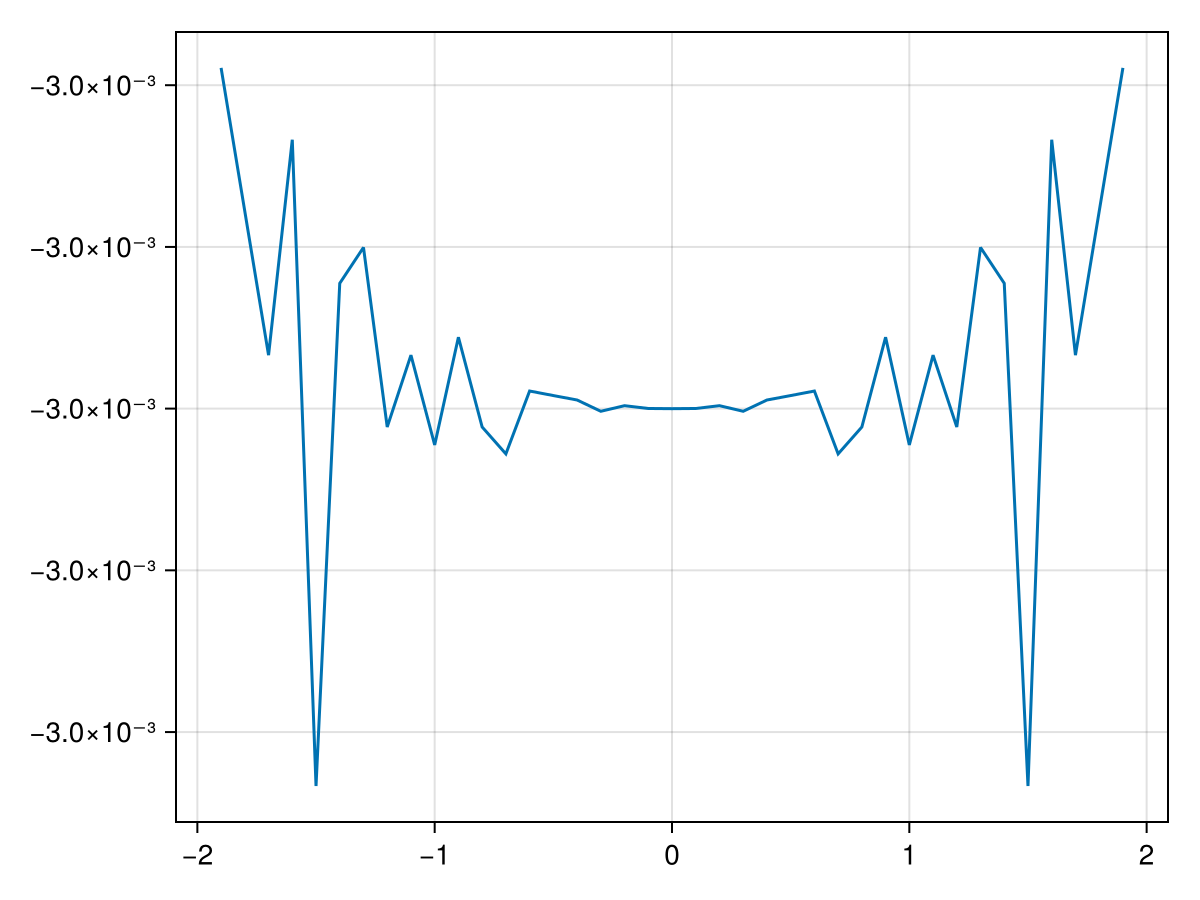

In [153]:
dx = 0.1
x = -2.0:dx:2.0
y = 0.3*x.^3

dydx = ([y; 0; 0] - [0; 0; y]) / (2 * dx)


f = Figure()
ax = Axis(f[1,1])

#lines!(ax, x, 0.9 * x.^2)
lines!(ax, x[2:end-1], 0.9 * x[2:end-1].^2 - dydx[3:end-2])

f